In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data\PreprocessedBankChurners.csv')
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,50,3,39,5,1,3,12691.0,777,11914.0,...,0,0,1,0,0,0,0,1,0,0
1,0,60,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,0,0,0,1,0
2,0,60,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,0,0,1,0,0
3,0,50,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,0,0,0,1
4,0,50,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,0,1,0,0,1,0,0


In [3]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Sing

In [4]:
df = df.drop(['Avg_Open_To_Buy', 'Months_on_book'], axis=1)

In [5]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [6]:
X = df.iloc[:, df.columns != 'Attrition_Flag']
y = df['Attrition_Flag']
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
import time
time.ctime()

'Mon Jan 18 14:28:03 2021'

In [8]:
param_grid = {    
    'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
     'max_depth' : np.arange(1,10),
     'n_estimators' : [1,100,1000]}
gb = GradientBoostingClassifier(random_state=42)

gb_cv= GridSearchCV(gb,param_grid,cv=5)
gb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [1, 100, 1000]})

In [9]:
time.ctime()

'Mon Jan 18 16:01:57 2021'

In [10]:
gb_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}

In [18]:
gb_best_param = GradientBoostingClassifier(n_estimators = 1000, learning_rate=0.1, max_depth=4, random_state=42)
gb_best_param.fit(X_train,y_train)
y_pred=gb_best_param.predict(X_test)

In [19]:
print(confusion_matrix(y_test, y_pred))

[[2083   30]
 [  47  372]]


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2113
           1       0.93      0.89      0.91       419

    accuracy                           0.97      2532
   macro avg       0.95      0.94      0.94      2532
weighted avg       0.97      0.97      0.97      2532



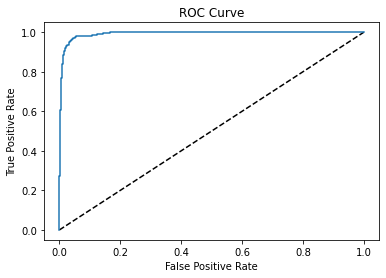

In [21]:
y_pred_prob = gb_best_param.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Case Study')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

In [22]:
roc_auc_score(y_test, y_pred_prob)

0.9924108852235338